<Axes: ylabel='Density'>

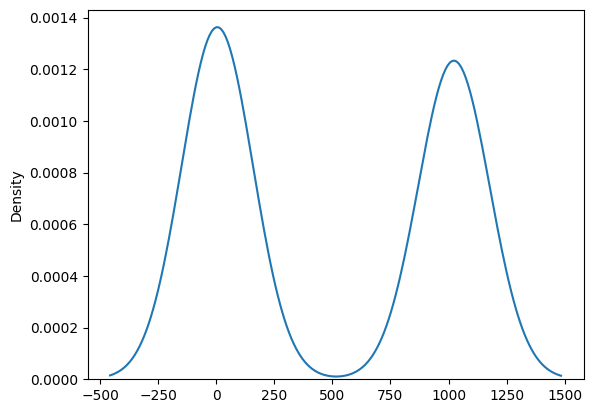

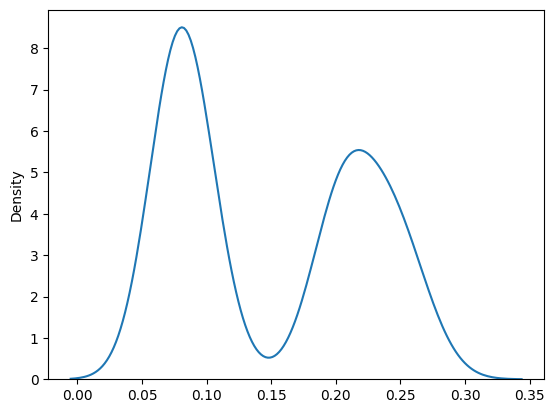

In [7]:
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

def extract_matching_stats(log_file):
    match_length = []
    match_overhead = []
    with open(log_file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            if 'matching_overhead' in line:
                pattern = r"'prefix_match_len': (\d+),.*?'matching_overhead': ([\d.]+)"
                match = re.search(pattern, line)
                if match:
                    match_length.append(int(match.group(1)))
                    match_overhead.append(float(match.group(2)))
    return match_length, match_overhead


log_file = '/mnt/ssd1/alm-os/sglang_multi_model/dump_400.log'
match_lens, match_overheads = extract_matching_stats(log_file)

match_lens, match_overheads = np.array(match_lens), np.array(match_overheads)
plt.figure()
sns.kdeplot(match_lens)
plt.figure()
sns.kdeplot(match_overheads)